Применение многоканальных систем массового обслуживания с отказами к конструированию телекоммуникационных сетей


In [46]:
import numpy as np
import matplotlib.pyplot as plt

1. Формулировка основных результатов


In [47]:
def P_n(rho: float, n: int) -> float:
    res = 0

    for k in range(0, n + 1):
        temp = rho**-k

        for j in range(0, k - 1 + 1):
            temp *= 1 - j / n

        res += temp
    return res**-1

Теорема 1


In [48]:
n_start = 1
n_stop = 500

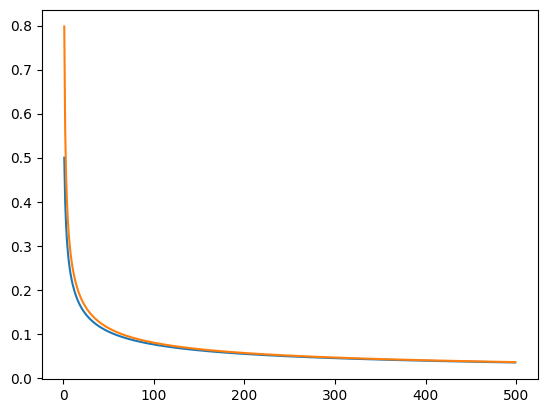

In [49]:
plt.plot(
    [n for n in range(n_start, n_stop)],
    [P_n(1, n) for n in range(n_start, n_stop)],
)
plt.plot(
    [n for n in range(n_start, n_stop)],
    [(2 / (np.pi * n)) ** 0.5 for n in range(n_start, n_stop)],
)


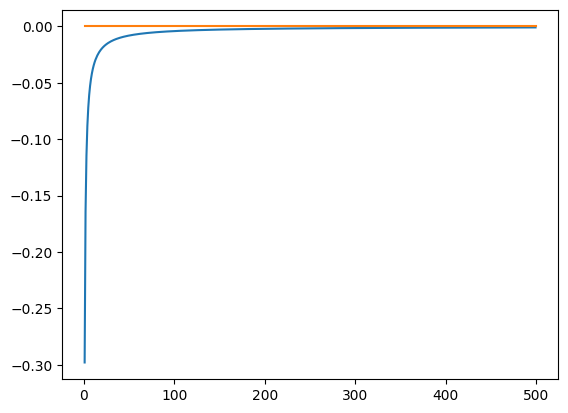

In [50]:
plt.plot(
    [n for n in range(n_start, n_stop)],
    [P_n(1, n) - (2 / (np.pi * n)) ** 0.5 for n in range(n_start, n_stop)],
)
plt.plot(
    [n for n in range(n_start, n_stop)],
    [0 for _ in range(n_start, n_stop)],
)

Теорема 2


In [51]:
rho = 0.7

n_start = 1
n_stop = 500

In [52]:
def f1(n: int, rho: float) -> float:
    return (
        np.exp(-n * np.log(rho) ** 2 / 2) * np.sqrt(2 / (np.pi * n)) * np.sqrt(rho / 8)
    )

In [53]:
def f2(n: int, rho: float) -> float:
    return (
        np.exp(-n * np.log(rho) ** 2 / 2 * (rho - 1) / np.log(rho))
        * np.sqrt(2 / (np.pi * n))
        * np.sqrt(np.log(rho) / (rho - 1))
    )

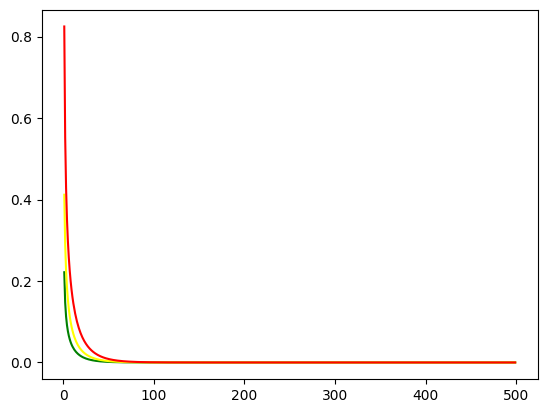

In [54]:
plt.plot(
    [n for n in range(n_start, n_stop)],
    [f1(n, rho) for n in range(n_start, n_stop)],
    color="green",
)

plt.plot(
    [n for n in range(n_start, n_stop)],
    [P_n(rho, n) for n in range(n_start, n_stop)],
    color="yellow",
)

plt.plot(
    [n for n in range(n_start, n_stop)],
    [f2(n, rho) for n in range(n_start, n_stop)],
    color="red",
)

In [55]:
pho = 0
while pho < 1:
    for n in range(n_start, n_stop):
        assert f1(n, rho) <= P_n(rho, n) <= f2(n, rho)
    pho += 0.1

Теорема 3


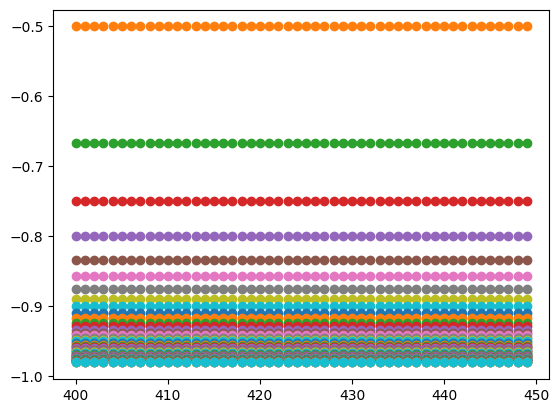

In [69]:
x = []
y = []
mu = 0.1

l = 0.1
while l < 5:
    pho = l / mu
    if pho > 1:
        # print(pho)
        for n in range(400, 450):
            x.append(n)
            y.append(P_n(rho, n) - (1 - mu / l))
        ...
    l += 0.1
    plt.scatter(x, y)
    x = []
    y = []

2. Применение асимптотических формул к задачам конструирования
